We preprocess Sleep EDF files

we resample data to 200Hz, apply band pass filter 0 ~ 75Hz, (same seed dataset)

In [ ]:
!pip install pyedflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyedflib import highlevel
import numpy as np
import glob

path1 = '/content/drive/MyDrive/sleep_edfx/data/sleep-cassette'
path2 = '/content/drive/MyDrive/sleep_edfx/data/sleep-telemetry'
data_list_cassette = sorted(glob.glob(path1+'/**'))
data_list_telemetry = sorted(glob.glob(path2+'/**')) 

print('number of cattette files',len(data_list_cassette))
print('number of telemetry files',len(data_list_telemetry))

number of cattette files 306
number of telemetry files 88


In [ ]:
#First, investigate cassette files.
trains_SC = [x for x in data_list_cassette if x.endswith('PSG.edf')]
labels_SC= [x for x in data_list_cassette if x.endswith('Hypnogram.edf')]

trains_ST = [x for x in data_list_telemetry if x.endswith('PSG.edf')]
labels_ST= [x for x in data_list_telemetry if x.endswith('Hypnogram.edf')]

print('number of SC_train samples:',len(trains_SC))
print('number of SC_labels:',len(labels_SC))
print('number of ST_train samples:',len(trains_ST))
print('number of ST_labels:',len(labels_ST))

number of SC_train samples: 153
number of SC_labels: 153
number of ST_train samples: 44
number of ST_labels: 44


In [ ]:
for i in range(len(trains_SC)):
    print(trains_SC[i].split('/')[-1].split('-')[0])
    print(labels_SC[i].split('/')[-1].split('-')[0])
    print('-----')
    if i > 4:
      break
print('...')

SC4001E0
SC4001EC
-----
SC4002E0
SC4002EC
-----
SC4011E0
SC4011EH
-----
SC4012E0
SC4012EC
-----
SC4021E0
SC4021EH
-----
SC4022E0
SC4022EJ
-----
...


In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mne

In [ ]:
import mne
data = mne.io.read_raw_edf(trains_SC[0])
X = data.get_data()

Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [ ]:
X.shape # EEG signal

(7, 7950000)

In [ ]:
ann = mne.read_annotations(labels_SC[2])
print(ann.duration)
print('------')
print(ann.description)

[2.154e+04 3.600e+02 6.000e+01 6.000e+01 1.800e+02 5.100e+02 3.000e+01
 1.500e+02 1.800e+02 2.100e+02 6.000e+01 1.800e+02 3.600e+02 3.000e+01
 1.200e+02 6.900e+02 3.000e+01 3.600e+02 3.000e+01 1.200e+02 3.000e+01
 9.000e+01 6.000e+01 6.000e+01 3.000e+01 1.200e+02 3.000e+01 3.000e+01
 9.000e+01 2.700e+02 9.000e+01 6.900e+02 1.200e+02 2.100e+02 2.100e+02
 3.000e+01 9.000e+01 3.000e+02 3.000e+01 8.700e+02 1.650e+03 1.110e+03
 3.000e+01 3.000e+01 9.000e+01 3.000e+01 5.700e+02 3.000e+01 9.000e+01
 3.000e+01 7.800e+02 3.000e+01 1.050e+03 3.000e+01 1.380e+03 3.000e+01
 6.000e+01 9.000e+01 1.200e+02 2.100e+02 3.900e+02 9.000e+01 6.000e+01
 9.000e+01 3.000e+01 3.000e+01 6.000e+01 1.200e+02 1.200e+02 7.500e+02
 6.000e+01 6.000e+02 1.170e+03 1.320e+03 6.000e+01 1.200e+02 3.000e+01
 3.000e+01 9.000e+01 6.000e+01 6.000e+01 1.200e+02 6.000e+01 6.000e+01
 3.000e+01 3.000e+01 3.000e+01 6.000e+01 1.800e+02 3.000e+01 6.000e+01
 3.000e+01 1.230e+03 6.000e+01 3.300e+02 6.000e+01 3.000e+02 6.000e+01
 1.200

In [ ]:
labels = []
for dur, des in zip(ann.duration, ann.description):
    for i in range(int(dur) // 30):
        labels.append(des[-1])

In [ ]:
sum(ann.duration)*100

8640000.0

In [ ]:
print(len(labels))
print(8406000//(100*30))

2880
2802


label수랑, 신호의 갯수가 맞지 않음,, 신호 마지막에 'Sleep stage ?'에 비정상적으로 긴 label이 있는데, 

이 부분을 삭제, 및 신호의 시작과 label의 시작을 맞춤

Self-supervised Electroencephalogram Representation Learning for Automatic Sleep Staging 참고

https://arxiv.org/ftp/arxiv/papers/2110/2110.15278.pdf


In [ ]:
for slice_index in range(X.shape[1] // (100 * 30)):
    # ingore the no labels
    if labels[slice_index] == '?':
        continue
    print(X[:, slice_index * 100 * 30: (slice_index+1) * 100 * 30].shape)
    print(labels[slice_index])
    if slice_index >= 10:
        break

(7, 3000)
W
(7, 3000)
W
(7, 3000)
W
(7, 3000)
W
(7, 3000)
W
(7, 3000)
W
(7, 3000)
W
(7, 3000)
W
(7, 3000)
W
(7, 3000)
W
(7, 3000)
W


annotaion과 그에 해당하는 신호들을 추출 가능!

------

다양한 dataset을 가지고 SSL을 하고자 하는데, sampling rate를 200Hz로 통일 하고자 함. sampling rate가 200Hz가 정답이 아님. 

데이터를 불러올때 마다 원하는 sampling rate로 불러 올 수 있는데(mne.fikter.resample()), 이 과정이 오래걸려서 애초에 200Hz로 저장하려고 함.

band pass filtter [0 ~ 75Hz] 적용

In [ ]:
X = data.get_data()[:2,:]
X1 = mne.filter.resample(X, up = 2.0) # upsampling to 200Hz  
print(X.shape)
print(X1.shape[1]/2)

(2, 7950000)
7950000.0


In [ ]:
X1 = mne.filter.filter_data(X1, sfreq = 200, l_freq=0., h_freq=75.)

Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.6s finished


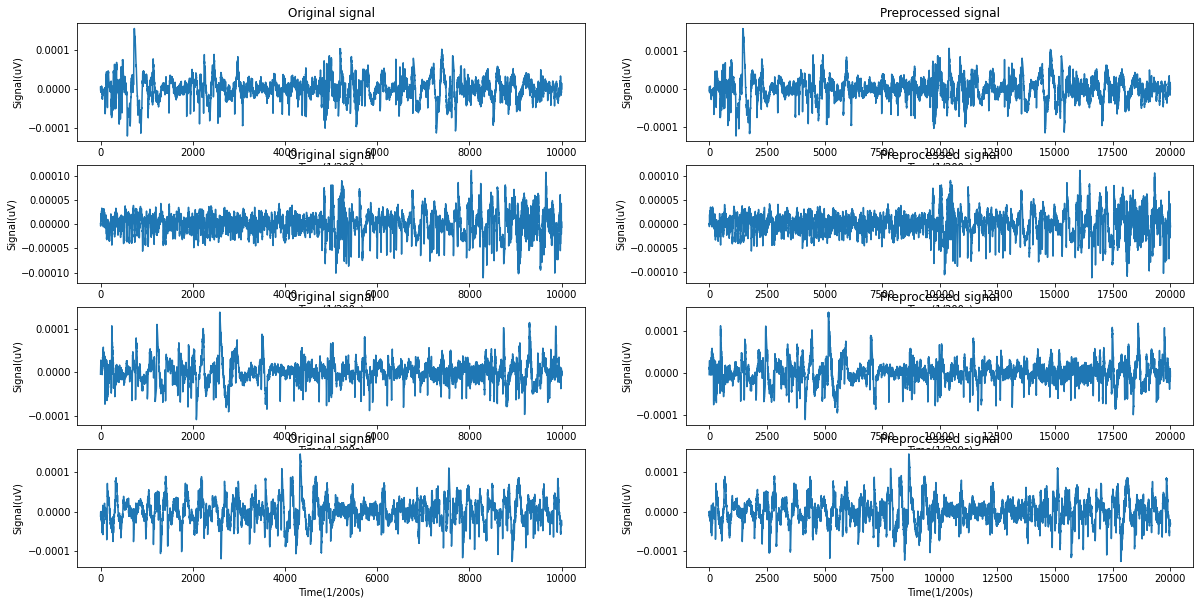

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0,10000,10000)
x1 = np.linspace(0,20000,20000)

plt.figure(figsize =(20, 10))


for i in range(4):
  
  y = X[0,i*10000:(1+i)*10000]
  plt.subplot(4, 2, 2*i+1)
  plt.plot(x,y)

  plt.title('Original signal')
  plt.xlabel('Time(1/200s)')
  plt.ylabel('Signal(uV)')
  
  y1 = X1[0,i*20000:(1+i)*20000]
  plt.subplot(4, 2, 2*(i+1))
  plt.plot(x1,y1)
  

  plt.title('Preprocessed signal')
  plt.xlabel('Time(1/200s)')
  plt.ylabel('Signal(uV)')
  
# plt.show()

In [ ]:
import os
import pickle

for i in range(len(trains_SC)):
    print(i)
    subjetc_id = trains_SC[i].split('/')[-1].split('-')[0]
    adress = '/content/drive/MyDrive/sleep_edfx/Preprocessed_EEG/SC'

    # folder dosen't exist, make folder
    if not os.path.exists(adress+'/{}'.format(subjetc_id)):
        os.makedirs(adress +'/{}'.format(subjetc_id))
    # folder exists, pass
    elif os.path.exists(adress+'/{}'.format(subjetc_id)):
        continue  
    
    data_adress = adress +'/{}'.format(subjetc_id)
    # load signal and upsampling
    data = mne.io.read_raw_edf(trains_SC[i])
    data = data.get_data()[:2,:]
    data = mne.filter.resample(data, up = 2.0) # upsampling to 200Hz  
    data = mne.filter.filter_data(data, sfreq = 200, l_freq=0., h_freq=75.)
    
    # load annotaion
    ann = mne.read_annotations(labels_SC[i])
    labels = []
    for dur, des in zip(ann.duration, ann.description):
        for i in range(int(dur) // 30):
            labels.append(des[-1])

    for slice_index in range(data.shape[1] // (200 * 30)): # 200Hz, 30epochs
    # ingore the no labels
        if labels[slice_index] == '?':
            continue
            
        data_path = data_adress +'/'+ str(subjetc_id) + '_' + str(slice_index) + '.npz'
        X = data[:, slice_index * 200 * 30: (slice_index+1) * 200 * 30]
        Y = labels[slice_index]
        np.savez(data_path, x = X, y = Y)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152


In [ ]:
for i in range(len(trains_ST)):
    print(i)
    subjetc_id = trains_ST[i].split('/')[-1].split('-')[0]
    

    adress = '/content/drive/MyDrive/sleep_edfx/Preprocessed_EEG/ST'
    if not os.path.exists(adress+'/{}'.format(subjetc_id)):
        os.makedirs(adress +'/{}'.format(subjetc_id))
    
    data_adress = adress +'/{}'.format(subjetc_id)

    # load signal and upsampling
    data = mne.io.read_raw_edf(trains_ST[i])
    data = data.get_data()[:2,:]
    data = mne.filter.resample(data, up = 2.0) # upsampling to 200Hz  
    data = mne.filter.filter_data(data, sfreq = 200, l_freq=0., h_freq=75.)

    # load annotaion
    ann = mne.read_annotations(labels_ST[i])
    labels = []
    for dur, des in zip(ann.duration, ann.description):
        for i in range(int(dur) // 30):
            labels.append(des[-1])
    
    for slice_index in range(len(labels)): # 200Hz, 30epochs
    # ingore the no labels
        if labels[slice_index] == '?':
            continue
            
        data_path = data_adress +'/'+ str(subjetc_id) + '_' + str(slice_index) + '.npz'
        X = data[:, slice_index * 200 * 30: (slice_index+1) * 200 * 30]
        Y = labels[slice_index]
        np.savez(data_path, x = X, y = Y)
        
        

0
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7011J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s finished


1
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7012J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s finished


2
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7021J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s finished


3
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7022J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s finished


4
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7041J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s finished


5
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7042J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s finished


6
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7051J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s finished


7
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7052J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s finished


8
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7061J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s finished


9
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7062J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s finished


10
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7071J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s finished


11
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7072J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s finished


12
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7081J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s finished


13
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7082J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s finished


14
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7091J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s finished


15
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7092J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s finished


16
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7101J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s finished


17
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7102J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s finished


18
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7111J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s finished


19
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7112J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s finished


20
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7121J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s finished


21
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7122J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s finished


22
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7131J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s finished


23
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7132J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s finished


24
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7141J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s finished


25
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7142J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s finished


26
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7151J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s finished


27
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7152J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s finished


28
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7161J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s finished


29
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7162J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s finished


30
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7171J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s finished


31
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7172J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s finished


32
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7181J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s finished


33
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7182J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s finished


34
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7191J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s finished


35
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7192J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s finished


36
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7201J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s finished


37
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7202J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s finished


38
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7211J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s finished


39
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7212J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s finished


40
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7221J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s finished


41
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7222J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s finished


42
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7241J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s finished


43
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-telemetry/ST7242J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s finished


In [ ]:
a = np.load('/content/drive/MyDrive/sleep_edfx/Preprocessed_EEG/ST/ST7011J0/ST7011J0_0.npz')

In [ ]:
a['y']

array('W', dtype='<U1')

In [ ]:
i = 125
subjetc_id = trains_SC[i].split('/')[-1].split('-')[0]
adress = '/content/drive/MyDrive/sleep_edfx/Preprocessed_EEG/SC'


data_adress = adress +'/{}'.format(subjetc_id)
    # load signal and upsampling
data = mne.io.read_raw_edf(trains_SC[i])
data = data.get_data()[:2,:]
data = mne.filter.resample(data, up = 2.0) # upsampling to 200Hz  
data = mne.filter.filter_data(data, sfreq = 200, l_freq=0., h_freq=75.)
    
    # load annotaion
ann = mne.read_annotations(labels_SC[i])
labels = []
for dur, des in zip(ann.duration, ann.description):
    for i in range(int(dur) // 30):
        labels.append(des[-1])

for slice_index in range(data.shape[1] // (200 * 30)): # 200Hz, 30epochs
    # ingore the no labels
    if labels[slice_index] == '?':
        continue
            
    data_path = data_adress +'/'+ str(subjetc_id) + '_' + str(slice_index) + '.npz'
    X = data[:, slice_index * 200 * 30: (slice_index+1) * 200 * 30]
    Y = labels[slice_index]
    np.savez(data_path, x = X, y = Y)
        

Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-cassette/SC4651E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up low-pass filter at 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 37 samples (0.185 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s finished
